# IMPORTS

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# test this works on your machine
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [16]:
S = pd.read_csv('ds_salaries.csv')
# S = S[S['company_location'] != 'US']
target_v = 'salary'
# S = S.drop(['salary_in_usd','remote_ratio'], axis = 1)
# S = S.drop('experience_level', axis = 1)
S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


# EDA

Some tests to explore

In [17]:
# for index, row in S.iterrows():
#     if row['experience_level'] == 'EN' and row['salary'] > 100000:
#         print(row['salary'], row['salary_in_usd'], row['salary_currency'], row['company_location'], row['experience_level'])


<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

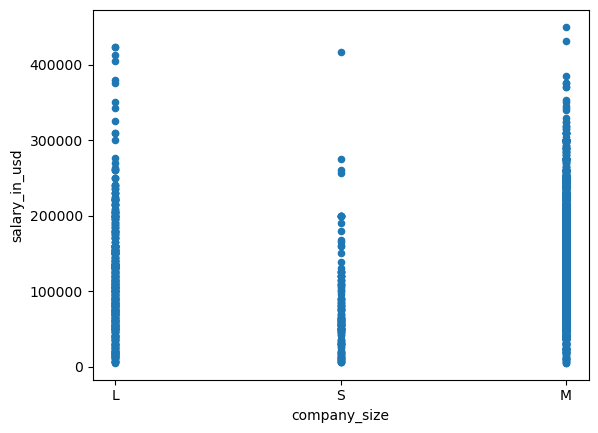

In [18]:
S.plot(kind='scatter', x='company_size', y='salary_in_usd')

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### ETL

Creating dummy variables and reforming the DF

In [20]:
string_cols1 = []
numeric_cols1 = []
for key, val in S.iloc[44].to_dict().items():
    if isinstance(val, str):
        string_cols1.append(key)
    else:
        numeric_cols1.append(key)

In [21]:
numeric_from_df1 = S[numeric_cols1]
dummy_vars1 = pd.get_dummies(S[string_cols1])

In [22]:
S = pd.concat([numeric_from_df1, dummy_vars1], axis = 1)

In [23]:
# exp = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
# emptype = {'FT': 3, 'CT': 2, 'PT':1, 'FL':0}
# compsize = {'L':2, 'M':1, 'S':0}
# empresd = {}
# job = {}


# i = 0
# for x in S['employee_residence'].unique():
#     empresd[x] = i
#     i+=1

# empresd['AL'] = 78
# empresd['BS'] = 79

# i = 0
# for x in S['job_title'].unique():
#     job[x] = i
#     i+=1


In [24]:
# S['experience_level'] = S['experience_level'].map(exp)
# S['employment_type'] = S['employment_type'].map(emptype)
# S['company_size'] = S['company_size'].map(compsize)
# S['employee_residence'] = S['employee_residence'].map(empresd)
# S['job_title'] = S['job_title'].map(job)

Creating variables for the model

In [25]:

YS = S[target_v]
XS = S.drop(target_v, axis = 1)



In [26]:
Xt, Xe, Yt, Ye = train_test_split(XS, YS, test_size = 0.25)

#### Test for multicolinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
# vif_data = pd.DataFrame()
# vif_data["feature"] = S._get_numeric_data().columns
# vif_data['VIF'] = [variance_inflation_factor(XS.values, i) for i in range(len(S._get_numeric_data().columns))]
# print(vif_data)

In [29]:
? tree.DecisionTreeRegressor

Init signature:
 tree.DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 lo

[Text(0.4807692307692308, 0.9166666666666666, 'employee_residence_CL <= 0.5\nsquared_error = 512621404938.398\nsamples = 2816\nvalue = 192003.211'),
 Text(0.4423076923076923, 0.75, 'salary_currency_INR <= 0.5\nsquared_error = 188523851430.255\nsamples = 2815\nvalue = 181272.128'),
 Text(0.19230769230769232, 0.5833333333333334, 'company_location_JP <= 0.5\nsquared_error = 96224958477.674\nsamples = 2768\nvalue = 151251.1'),
 Text(0.11538461538461539, 0.4166666666666667, 'salary_currency_HUF <= 0.5\nsquared_error = 47423871099.438\nsamples = 2765\nvalue = 144200.016'),
 Text(0.07692307692307693, 0.25, 'salary_in_usd <= 155949.5\nsquared_error = 4788702385.975\nsamples = 2764\nvalue = 140272.447'),
 Text(0.038461538461538464, 0.08333333333333333, 'squared_error = 1765167248.285\nsamples = 1781\nvalue = 103844.677'),
 Text(0.11538461538461539, 0.08333333333333333, 'squared_error = 3506536629.621\nsamples = 983\nvalue = 206272.303'),
 Text(0.15384615384615385, 0.25, 'squared_error = 0.0\nsa

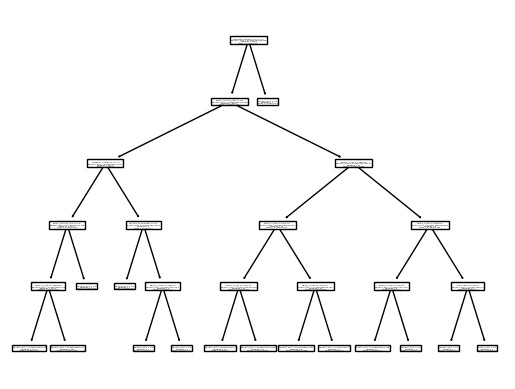

In [30]:
dtree = tree.DecisionTreeRegressor(max_depth = 5)
dtree= dtree.fit(Xt, Yt)
features = XS.columns
tree.plot_tree(dtree, feature_names = features)

In [31]:
dtree.score(Xe, Ye)

-2.98863510022474

In [32]:
dtree.score(Xt, Yt)

0.9945007026008135

In [33]:
scores = []
scoresneg = []
for x in range(100):
    Xt, Xe, Yt, Ye = train_test_split(XS, YS, test_size = 0.3)
    dtree= dtree.fit(Xt, Yt)
    if dtree.score(Xe, Ye) >0:
        scores.append(dtree.score(Xe, Ye))
    else:
        scoresneg.append(dtree.score(Xe, Ye))

print(sum(scores)/len(scores))
print(scoresneg)

0.5831153347907789
[-1.6913459549643393, -3.930130165782505, -1.5474815958537942, -1.806979246237244, -0.5291960177315587, -1.4219503734224461, -4.094331942288377, -3.6722349277449498, -2.229511409377441, -4.089801469530704]
